<a href="https://colab.research.google.com/github/Kushan1001/Hotel-booking-data-analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = '/content/drive/MyDrive/Capstone project/EDA/Data/Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)


In [3]:
# a glance of the pandas dataframe
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# checking percentage of null values in the dataframe
hotel_df.isnull().sum()/len(hotel_df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [5]:
# Dropping agent and company's columns as there are high percentage of null values
hotel_df.drop(columns=['company','agent'],inplace = True)

In [6]:
# getting sum of null values of the country's column
hotel_df['country'].isnull().sum()

488

In [7]:
# getting mode of the coutry's column
hotel_df['country'].mode()

0    PRT
dtype: object

In [8]:
# filling NA values of the country's column with mode of the data
hotel_df['country'] = hotel_df['country'].fillna('PRT')

In [9]:
#getting statistics of the data 
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

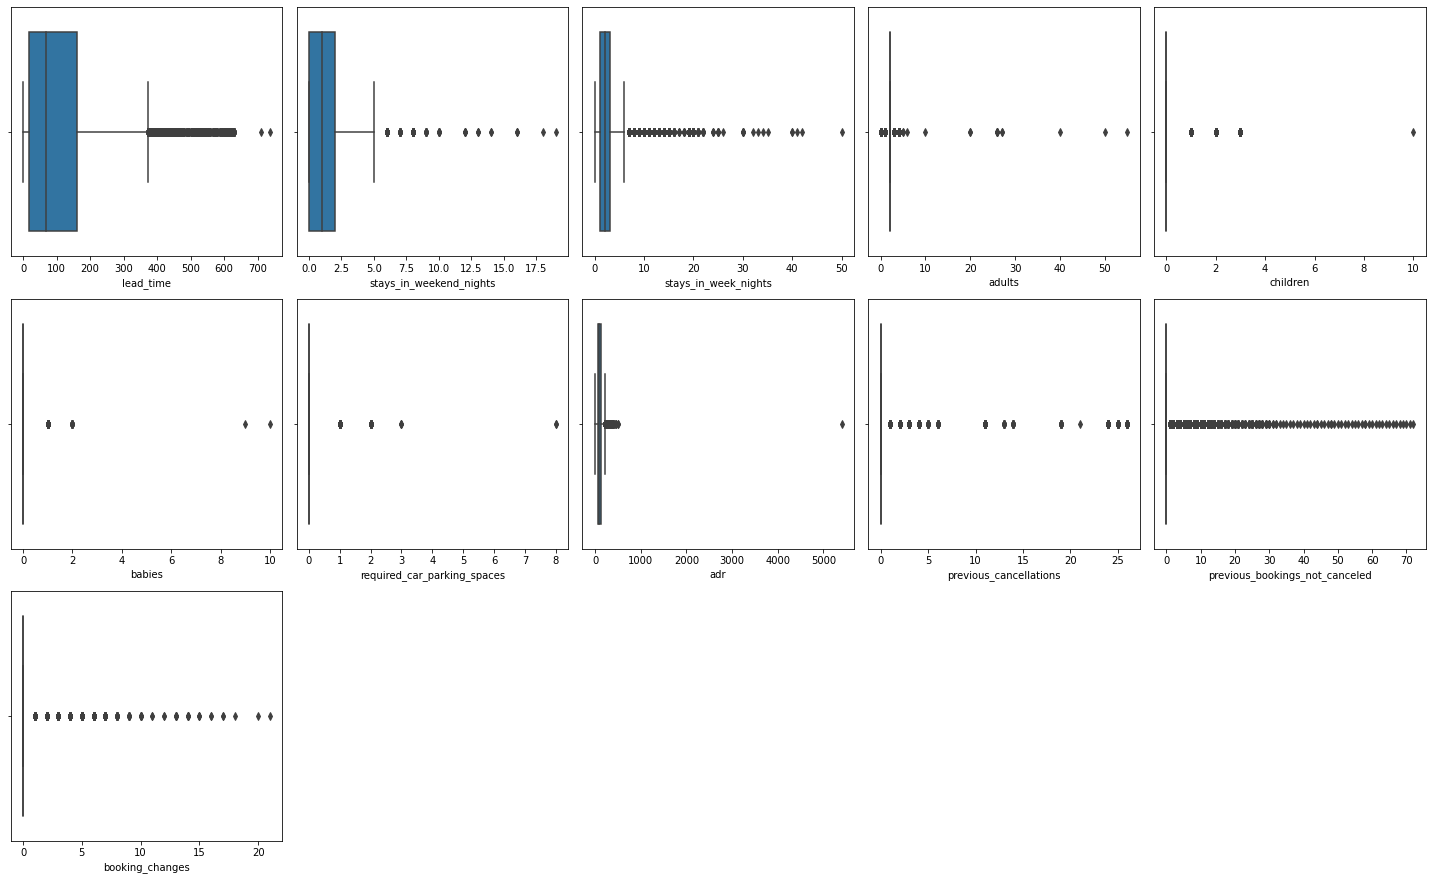

In [10]:
# checking for ouliers
list_of_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize = (20,20))

for elem in list_of_columns:
  plt.subplot(5,5,n)
  n = n+1
  sns.boxplot(hotel_df[elem])
  plt.tight_layout();

In [11]:
#removing outliers based on conditional filtering
hotel_df = hotel_df.loc[hotel_df['lead_time'] < hotel_df['lead_time'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_weekend_nights'] < hotel_df['stays_in_weekend_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['stays_in_week_nights'] < hotel_df['stays_in_week_nights'].quantile(0.99)]
hotel_df = hotel_df.loc[hotel_df['adults'] < 4]
hotel_df = hotel_df.loc[hotel_df['children'] < 5]
hotel_df = hotel_df.loc[hotel_df['babies'] < 4]
hotel_df = hotel_df.loc[hotel_df['required_car_parking_spaces'] < 5]
hotel_df = hotel_df.loc[hotel_df['adr'] < 1000]


## **Data Analysis and Visualistion**

In [12]:
#creating a new column of adults with children to check weather adults prefer to travel solo or with children/babies 
def do_adults_travel_with_family(col_1,col_2):
  ''' takes argument as children and babies 
      and compares it with adults and returns
      1 for if they any children/babies and 0 
      for if they don't have any'''
  if col_1 or col_2 != 0:
    return 1
  else:
    return 0

hotel_df['adults_with_children'] = hotel_df.apply(lambda x: do_adults_travel_with_family(x['children'],x['babies']),axis = 1)



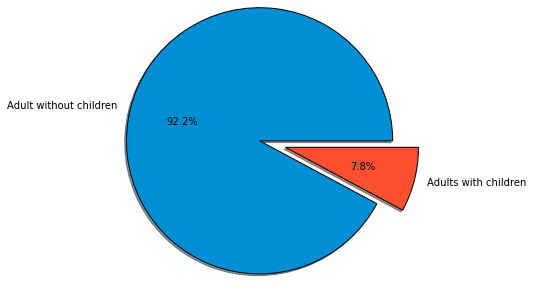

In [13]:
# visualising proportion of adults with and without any children

explode = [0.0,0.3]
labels = ['Adult without children','Adults with children']
colors = ['#008fd5','#fc4f30']
title = ('proportion of adults with and without any children')

plt.pie(hotel_df['adults_with_children'].value_counts(), wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        explode = explode, labels = labels, colors = colors,radius = 1.5, shadow = 'True')

plt.tight_layout()

# write title as well as whitegrid

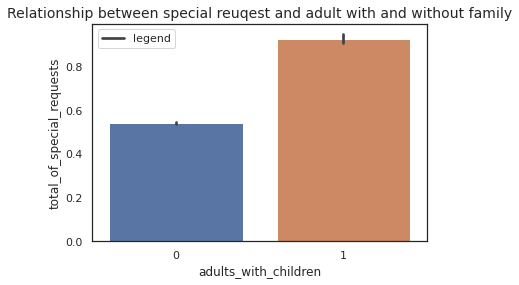

In [288]:
(sns.barplot(data = hotel_df, x = 'adults_with_children', y = 'total_of_special_requests')
.set_title('Relationship between special reuqest and adult with and without family', size = 14))


Text(0.5, 0, 'Month of arrival')

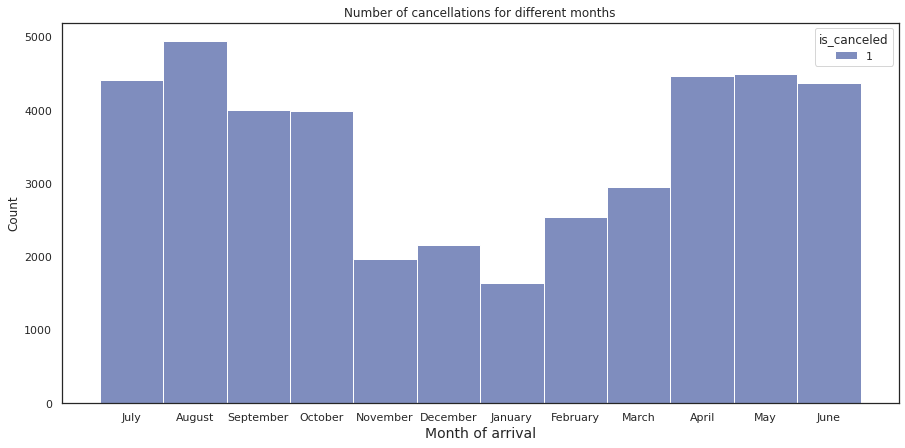

In [279]:
#number of cancellations for different months

no_of_cancellations = hotel_df.loc[hotel_df['is_canceled'] == 1, :]

sns.set(style = 'white')

plt.figure(figsize = (15,7))
histogram_plot = sns.histplot(data = h , x = 'arrival_date_month', hue = 'is_canceled', palette = 'dark').set_title('Number of cancellations for different months')
plt.xlabel('Month of arrival',size = 14)

#sort order of months


Text(0.5, 0, 'Hotel Types')

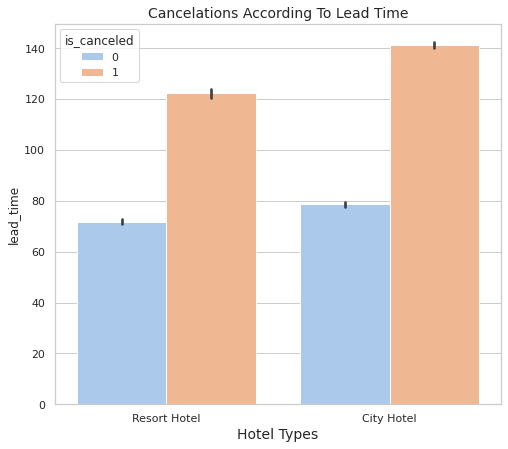

In [211]:
# connection between lead time and number of cancellations

plt.figure(figsize = (8,7))

cancelations_according_to_lead_time = hotel_df.loc[ : , ['hotel','is_canceled','lead_time']]

sns.barplot(data = cancelations_according_to_lead_time, x = 'hotel', y = 'lead_time', hue = 'is_canceled', palette= 'pastel').set_title('Cancelations According To Lead Time', size = 14)
plt.xlabel('Hotel Types', size = 14)

Text(0.5, 0, 'Deposit Types')

<Figure size 1080x1080 with 0 Axes>

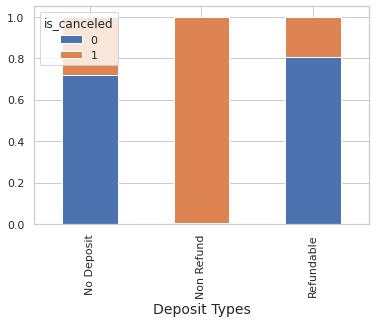

In [253]:
# Realationship between cancellations and deposits

plt.figure(figsize = (15,15))

deposit_cancelltion_barplot = hotel_df.groupby('deposit_type')['is_canceled'].value_counts(normalize=True).unstack('is_canceled').plot.bar(stacked=True)
plt.xlabel('Deposit Types', size = 14)

#label position

Text(0.5, 0, 'Months, size = 14')

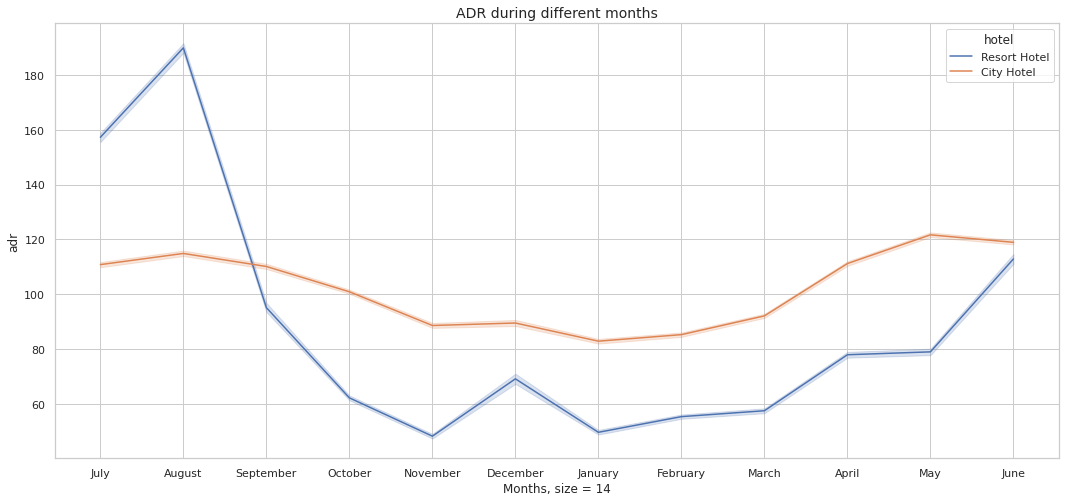

In [269]:
# ADR for months

plt.figure(figsize = (18,8))

sns.lineplot(data = hotel_df, x = 'arrival_date_month', y = 'adr', hue = 'hotel').set_title('ADR during different months', size = 14)
plt.xlabel('Months, size = 14')

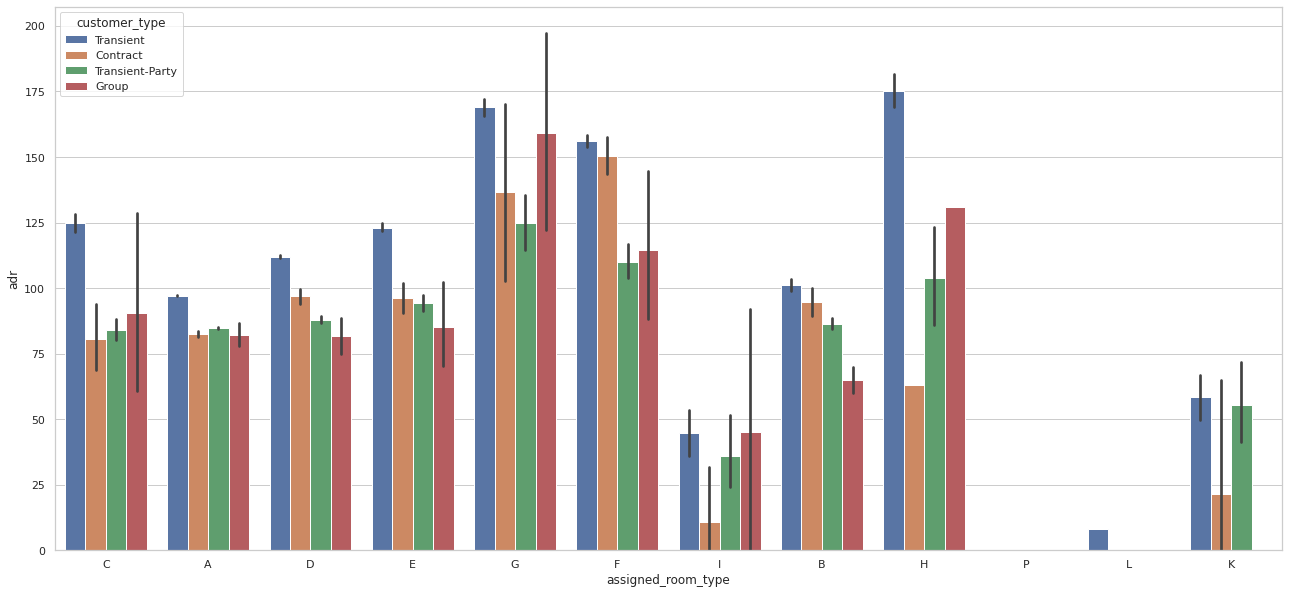

In [272]:
# ADR for different room and customer types

plt.figure(figsize = (22,10))

sns.barplot(data = hotel_df, y = 'adr', x = 'assigned_room_type', hue = 'customer_type')
